In [1]:
from qiskit import *
import numpy as np
from qiskit.quantum_info.operators import Operator

In [16]:
def BS(angulo):
    cx = Operator([
        [np.cos(angulo), 1j*np.sin(angulo)],
        [1j*np.sin(angulo), np.cos(angulo)],
    ])
    return cx
def O(a,b):
    cx = Operator([
        [0,a, 0,0],
        [a,0,0,0],
        [0,0,0,1j*b],
        [0,0,1j*b,0]
    ])
    return cx
def mirror(a):
    cx = Operator([
        [0, np.exp(1j*a)],
        [np.exp(1j*a), 0],
    ])
    return cx

In [20]:
qr=QuantumRegister(2) # esto es un registo cuantico , un registro de qubits
cr =ClassicalRegister(2) # este es un registro clasico, un registro de bits
circuit=QuantumCircuit(qr,cr)
circuit.append(BS(np.pi/4), [1])
circuit.append(mirror(np.pi/2), [1])
circuit.append(O(0.8,0.5999999), [0,1])
circuit.append(BS(np.pi/4), [1])
circuit.draw(output='mpl')

ExtensionError: 'Input matrix is not unitary.'

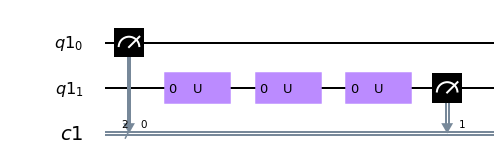

In [7]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

In [8]:
simulator=Aer.get_backend('qasm_simulator') #simulamos usando qasm
result=execute(circuit,backend=simulator).result()

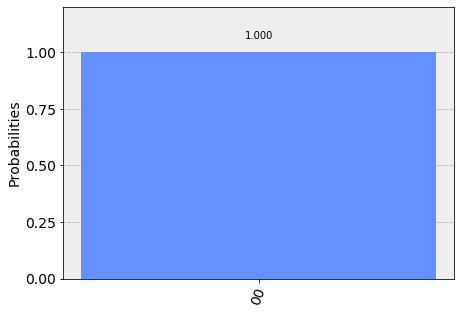

In [9]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))